# Analisis de señales periodicas - Series de Fourier <br>
Sistemas de Comunicación - SCT54 <br>
Instituto Tecnológico Metropolitano - ITM

## Las Series de Fourier

Cualquier señal periódica ($x(t)=x(t+T)$) se puede expresar como la suma infinita de senos y cosenos donde su frecuencias son multiplos de una frecuencia fundamental $f=\frac{1}{T}$, con T como el periodo. <br>

$$ x(t) = \frac{a}{2} + \sum_{n=1}^{\infty} \left[ a_n \cos(2n\pi f t) + b_n \sin(2n\pi f t) \right]$$ 

Donde los coeficientes $a_0$, $a_n$ y $b_n$ se calculan
$$a_0 = 2f \int_{-T/2}^{T/2} x(t) \operatorname{d}t,\quad a_n = 2f \int_{-T/2}^{T/2} x(t) \cos(2n\pi f t) \operatorname{d}t, \quad  b_n = 2f \int_{-T/2}^{T/2} x(t) \sin(2n\pi f t) \operatorname{d}t$$

Los limites de las integrales tambien pueden estar definidos de $[0,T]$, lo importante es analizar un periodo de la señal. Consideremos como ejemplo la siguiente señal periódica

<figure>
<center>
<img src='https://www.researchgate.net/publication/312928999/figure/fig1/AS:669069531430915@1536530015313/Square-wave-with-fifty-percent-duty-cycle-and-zero-volt-DC-offset_W640.jpg' />
<figcaption>Señal Periódica</figcaption></center>
</figure>

Calculamos inicialmente $a_0$ asi:
\begin{align} 
a_0 &= 2f \int_{-T/2}^{T/2} x(t) \operatorname{d}t 
\\ &= 2f \left[\int_{-T/2}^{0} (-1) \operatorname{d}t  + \int_{0}^{T/2} (1) \operatorname{d}t \right] 
\\ &= \frac{2}{T}\left[ \left.-t\right|_{-T/2}^0 + \left.t\right|_0^{T/2} \right]
\\ &= \frac{2}{T}\left[ -(0 - (-T/2)) + (T/2 - 0) \right]
\\ &= \frac{2}{T}\left[ -\frac{T}{2} + \frac{T}{2} \right] = 0 
\end{align}

Luego, calculamos los $a_n$ asumiendo que $\theta = 2n\pi ft$ y $\operatorname{d}\theta = 2n\pi f \operatorname{d}t$, entonces
\begin{align} 
a_n &= 2f \int_{-T/2}^{T/2} x(t)\cos(2n\pi f t) \operatorname{d}t \\ &= 2f \int_{-T/2}^{T/2} x(t)\cos(\theta) \frac{\operatorname{d}\theta}{2n\pi f} 
\\ &= \frac{2f}{2n\pi f} \left[\int_{-T/2}^{0} (-1) \cos(\theta) \operatorname{d}\theta  + \int_{0}^{T/2} (1) \cos(\theta) \operatorname{d}\theta \right] 
\\ &= \frac{1}{n\pi} \left[ \left. -\sin(2n\pi f t)\right|_{-T/2}^{0} + \left. \sin(2n\pi f t)\right|_{0}^{T/2} \right]  
\\ &= \frac{2}{T}\left[ -\left[\sin(0) - \sin(2n\pi f \times[-T/2])\right] + \left[\sin(2n\pi f T/2) - \sin(0)\right] \right]
\\ &= \frac{2}{T}\left[ -\sin(n\pi) + \sin(n\pi) \right] = 0
\end{align}

Calculamos los coeficientes $b_n$ usando la libreria Sympy.

In [1]:
import sympy as sym

T = sym.Symbol('T')
n = sym.Symbol('n', integer = True)
t = sym.Symbol('t')
V = sym.Symbol('V') # Se asume que la amplitud es V
f = 1/T
res = 2*f*V*(sym.integrate(-sym.sin(2*n*sym.pi*f*t),(t,-T/2,0))+sym.integrate(sym.sin(2*n*sym.pi*f*t),(t,0,T/2)))
print(sym.simplify(res))

Piecewise((0, Eq(2*pi*n/T, 0)), (V*(-2*(-1)**n + 2)/(pi*n), True))


In [0]:
import numpy as np

In [0]:
T = 0.001
t = np.linspace(0,T,100)
V = 4.0
f = 1.0/T

vt = 0.0

for n in range(1,10,2):
  vt = vt + V*(-2*(-1)**n + 2)/(n*np.pi)*np.sin(2.0*np.pi*f*n*t)

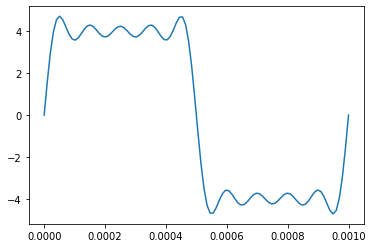

In [4]:
import matplotlib.pyplot as plt

plt.plot(t,vt)

### Ejemplo 1 <br>
a) Determinar las amplitudes máximas y las frecuencias de las primeras cinco armónicas impares. b) Trazar el espectro de frecuencias. c) Calcular el voltaje instantáneo total, para varios tiempos, y trazar la forma de onda en el dominio del tiempo. <br>
![texto alternativo](https://github.com/cdguarnizo/SCT54_ITM/blob/master/Notebooks/figs/Tomasi_eje_1-12.png?raw=true)

In [5]:
#Datos
T = 1e-3
V = 4.

#Caculos
f = 1/T   #Frecuencia fundamental
n = np.arange(1,10,2) #Vector de armonicos
print(n)

[1 3 5 7 9]


In [6]:
#Solucion parte a)
fn = f*n
Vn = 4.0*V/(np.pi*n)
print("fn=",fn,'\n',"Vn=",Vn)

fn= [1000. 3000. 5000. 7000. 9000.] 
 Vn= [5.09295818 1.69765273 1.01859164 0.72756545 0.56588424]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


<StemContainer object of 3 artists>

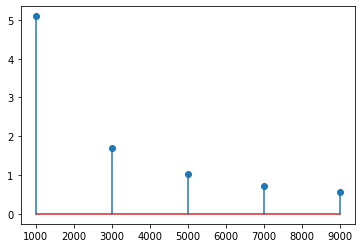

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

#Solucion parte b)
plt.stem(fn,Vn)

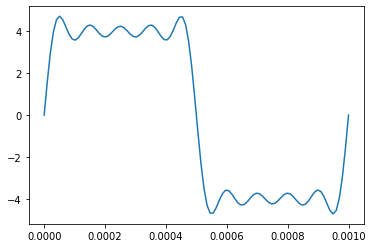

In [8]:
#Solucion parte c)
t = np.linspace(0,T,100)
Vt = 0.
for (fi,Vi) in zip(fn,Vn):
  Vt += Vi*np.sin(2.0*np.pi*fi*t)

plt.plot(t,Vt)

### Ejemplo 2
a) Determinar la componente de corriente directa (DC). b) Determine las amplitudes maximas de las 10 primeras armónicas. c) Grafique la funcion $\sin(x)/x$, con $x=\pi(\tau/T)$. Trace el espectro de frecuencias.

![texto alternativo](https://github.com/cdguarnizo/SCT54_ITM/blob/master/Notebooks/figs/Tomasi_eje_1-15.png?raw=true)

In [0]:
#Datos
tau = .4e-3
T = 2e-3
V = 1.0

DC = tau/T

In [10]:
# Solucion parte a) Componente DC
V0 = V*DC
print(V0)

0.2


In [11]:
# Solucion parte b) 
n = np.arange(1,10+1)
x = np.pi*DC
f = 1/T
fn = f*n
Vn = 2*V0*np.sin(n*x)/(n*x)

print(fn,Vn)

[ 500. 1000. 1500. 2000. 2500. 3000. 3500. 4000. 4500. 5000.] [ 3.74195714e-01  3.02730691e-01  2.01820461e-01  9.35489284e-02
  1.55926873e-17 -6.23659523e-02 -8.64944833e-02 -7.56826729e-02
 -4.15773015e-02 -1.55926873e-17]


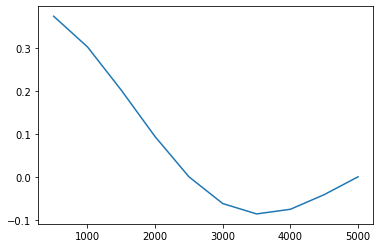

In [12]:
# Solucion parte c) ]
plt.plot(fn,Vn)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


<StemContainer object of 3 artists>

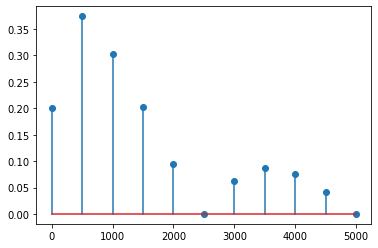

In [13]:
# Solucion parte d)
fn = np.hstack((0,fn))
Vn = np.hstack((V0,Vn))
plt.stem(fn,np.abs(Vn))